In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
Features = pd.read_excel('Labels.xlsx', 'All_Gestures_Deceptive and Trut', header=0,
index_col=False,
keep_default_na=True
)

print(Features)

                      id  OtherGestures  Smile  Laugh  Scowl  \
0      trial_lie_001.mp4              1      0      0      0   
1      trial_lie_002.mp4              1      0      0      0   
2      trial_lie_003.mp4              1      0      0      0   
3      trial_lie_004.mp4              1      0      0      0   
4      trial_lie_005.mp4              1      0      0      0   
..                   ...            ...    ...    ...    ...   
116  trial_truth_056.mp4              1      0      0      0   
117  trial_truth_057.mp4              1      0      0      0   
118  trial_truth_058.mp4              1      0      0      0   
119  trial_truth_059.mp4              0      0      0      1   
120  trial_truth_060.mp4              0      1      0      0   

     otherEyebrowMovement  Frown  Raise  OtherEyeMovements  Close-R  ...  \
0                       1      0      0                  1        0  ...   
1                       0      1      0                  1        0  ...   
2  

In [17]:
Features.head()

,id,OtherGestures,Smile,Laugh,Scowl,otherEyebrowMovement,Frown,Raise,OtherEyeMovements,Close-R,...,forwardHead,downRHead,singleHand,bothHands,otherHandM,complexHandM,sidewaysHand,downHands,upHands,class
0,trial_lie_001.mp4,1,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,deceptive
1,trial_lie_002.mp4,1,0,0,0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,deceptive
2,trial_lie_003.mp4,1,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,deceptive
3,trial_lie_004.mp4,1,0,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,deceptive
4,trial_lie_005.mp4,1,0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,deceptive


In [25]:
#Creating a new dataframe
features_new = Features[['Smile','Laugh','Scowl','Frown','gazeUp', 'gazeDown', 'gazeSide','OtherEyeMovements']]
features_new 

,Smile,Laugh,Scowl,Frown,gazeUp,gazeDown,gazeSide,OtherEyeMovements
0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,1,0,1
2,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,1
4,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...
116,0,0,0,0,0,1,0,1
117,0,0,0,0,0,0,1,0
118,0,0,0,0,0,0,0,0
119,0,0,1,0,0,0,1,0


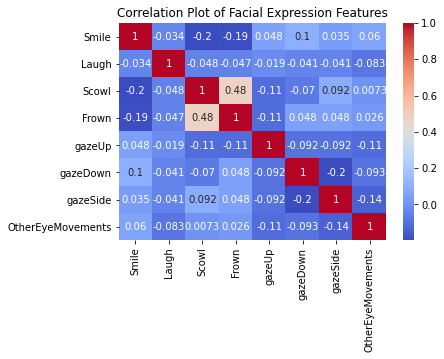

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a correlation matrix
corr_matrix = features_new.corr()

# plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# set the plot title
plt.title('Correlation Plot of Facial Expression Features')

# display the plot
plt.show()

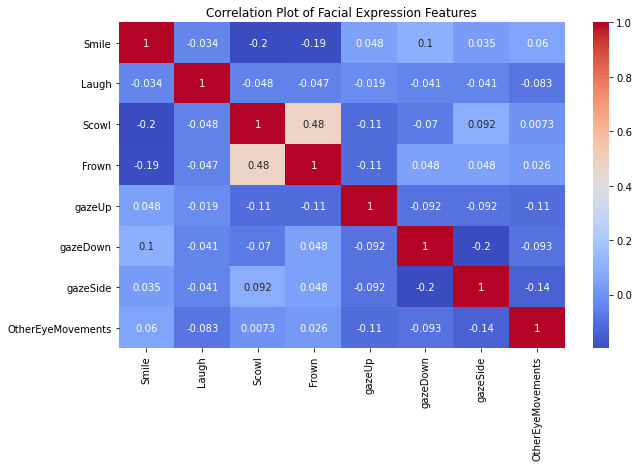

In [27]:
corr_matrix = features_new.corr()

# Set up the figure
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

# Plot the heatmap
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, ax=ax)

# Set the title and display the plot
ax.set_title("Correlation Plot of Facial Expression Features")
plt.show()

In [74]:
Final_features = Features[['Smile', 'Laugh', 'Scowl', 'Frown', 'gazeUp','gazeSide','gazeDown','class']]


In [72]:
#trail Function 1
def plot_grouped_bar_charts(Final_features):
    # Assign truth as 0 and lie as 1 for all columns
    Final_features = Final_features.replace({'Truthful': 0, 'Deceptive': 1})
    
    # Create grouped bar charts for each facial expression
    for expression in Final_features.columns:
        if expression != 'Class':
            # Group the data by expression and label
            group_data = df.groupby([expression, 'Smile']).size().reset_index(name='Count')

            # Pivot the data to create a grouped bar chart
            pivot_data = group_data.pivot(index=expression, columns='Smile', values='Count')

            # Plot the grouped bar chart
            pivot_data.plot(kind='bar', stacked=True)
            plt.xlabel('{}'.format(expression))
            plt.ylabel('Count')
            plt.title('Truth vs Lie Count for {}'.format(expression))
            plt.show()

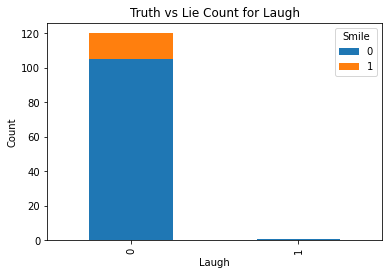

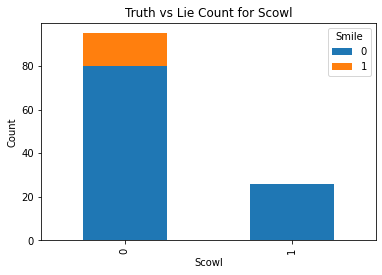

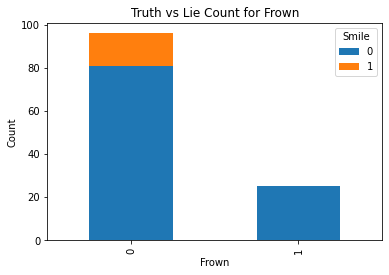

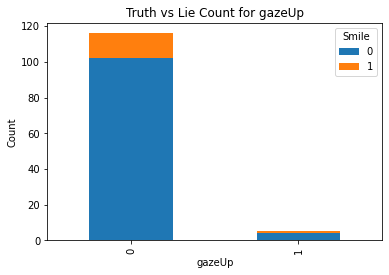

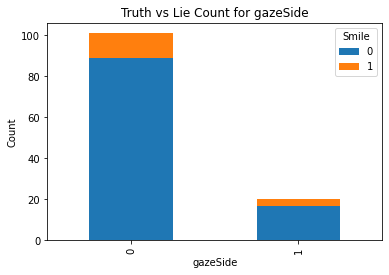

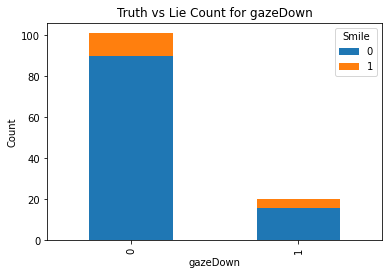

KeyError: 'class'

In [73]:
plot_grouped_bar_charts(Final_features)

In [64]:
#Trail Function 2

def plot_grouped_bar_charts(Final_features):
    # Assign truth as 0 and lie as 1
    Final_features['class']= Final_features['class'].map({'Truthful': 0, 'Deceptive': 1})
    
    # Create grouped bar charts for each facial expression
    for expression in expressions:
        # Group the data by expression and label
        group_data = features_new.groupby(['Smile', 'class']).size().reset_index(name='Count')

        # Pivot the data to create a grouped bar chart
        pivot_data = group_data.pivot(index=expressions, columns='class', values='Count')

        # Plot the grouped bar chart
        pivot_data.plot(kind='bar', stacked=True)
        plt.xlabel('Facial Expression')
        plt.ylabel('Count')
        plt.title('Truth vs Lie Count for {}'.format(expression))
        plt.show()

In [66]:
# Specify the facial expressions to plot
expressions = [['Laugh', 'Smile', 'Scowl', 'Frown','gazeUp', 'gazeSide','gazeDown','class']]

# Call the function to plot the grouped bar charts
plot_grouped_bar_charts(Final_features)

<ipython-input-64-6a0f6b71e2aa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final_features['class']= Final_features['class'].map({'Truthful': 0, 'Deceptive': 1})


KeyError: 'class'

In [36]:
#Trail Function 3
# import pandas as pd
# import matplotlib.pyplot as plt

# def grouped_bar_plot_expression(dataframe, expression, title="Expression", xlabel="", ylabel=""):
   
#     # Group the data by truth and lie counts for the expression
#     grouped_data = dataframe.groupby([expression]).agg({"Truth": "sum", "Lie": "sum"})

#     # Get the x-axis tick labels from the expression column
#     x_tick_labels = dataframe[expression].unique()

#     # Get the number of bars per group and the width of each bar
#     n_bars = len(grouped_data.columns)
#     bar_width = 1 / (n_bars + 1)

#     # Set up the plot
#     fig, ax = plt.subplots()
#     fig.set_size_inches(10, 6)

#     # Plot each group of bars
#     for i, col in enumerate(grouped_data.columns):
#         x_pos = [j + i * bar_width for j in range(len(x_tick_labels))]
#         ax.bar(x_pos, grouped_data[col], width=bar_width, edgecolor="white", label=col)

#     # Add labels and legend
#     ax.set_xticks([j + n_bars * bar_width / 2 for j in range(len(x_tick_labels))])
#     ax.set_xticklabels(x_tick_labels)
#     ax.set_title(title)
#     ax.set_xlabel(xlabel)
#     ax.set_ylabel(ylabel)
#     ax.legend()

#     plt.show()

In [ ]:
# data = {
#     "Laugh": ["Truth", "Lie", "Truth", "Lie", "Truth", "Lie"],
#     "Smile": ["Truth", "Lie", "Lie", "Truth", "Truth", "Lie"],
#     "Scowl": ["Truth", "Truth", "Lie", "Lie", "Truth", "Truth"],
#     "Frown": ["Lie", "Lie", "Truth", "Truth", "Truth", "Lie"],
#     "Raise": ["Truth", "Truth", "Truth", "Lie", "Lie", "Lie"],
#     "gazeUp": ["Lie", "Truth", "Truth", "Lie", "Truth", "Truth"],
#     "gazeSide": ["Truth", "Lie", "Truth", "Lie", "Lie", "Truth"],
#     "Truth": [3, 3, 3, 2, 4, 3],
#     "Lie": [3, 3, 2, 3, 1, 3]
# }
df = pd.DataFrame(features_new)

Create grouped bar plots for each expression
grouped_bar_plot_expression(df, "Laugh", title="Laugh Truth vs Lie Count", xlabel="Laugh Expression", ylabel="Count")


In [ ]:
grouped_bar_plot_expression(df, "Frown", title="Laugh Truth vs Lie Count", xlabel="Laugh Expression", ylabel="Count")
